#  Explanatory Analysis of Flights Dataset

## by Afamefuna Chidinma Deborah



#### Introduction to Data Set

This project reports flights schedules in the United States and visualizes the key features in the dataset for on-time performance and explanations on why flights may be delayed. The data covers the range from January 2014 to May 2020.

#### Research Questions
- Which airlines carrier had the worst on-time performance record?
- What are the prevalent reasons for delays? Explore air carrier, extreme weather , NAS,

How are flight delays calculated?

A flight is counted as "on time" if it operated less than 15 minutes later than the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).


### Investigative Summary

The dataset had 101950 rows and 21 columns. I was interested in the number of flights that arrived, were delayed, the delay time in minutes due to different delay types (carrier, security, weather, nas, late aircraft) which affected carriers. These variables would help in knowing which airlines carrier had the worst on-time performance record and the most prevalent delays.


<a id='data_imports'></a>
### Part I - Data_Imports

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#importing all the data for 7 years from 2014-2020 for all airports
df1 = pd.read_csv('flights 2014.csv',keep_default_na=False, na_values=[""])
df2 = pd.read_csv('flights 2015.csv',keep_default_na=False, na_values=[""])
df3 = pd.read_csv('flights 2016.csv',keep_default_na=False, na_values=[""])
df4 = pd.read_csv('flights 2017.csv',keep_default_na=False, na_values=[""])
df5 = pd.read_csv('flights 2018.csv',keep_default_na=False, na_values=[""])
df6 = pd.read_csv('flights 2019.csv',keep_default_na=False, na_values=[""])
df7 = pd.read_csv('flights 2020.csv',keep_default_na=False, na_values=[""])


<a id='Wrangling'></a>
### Part II - Wrangling

> All the dataframes have the same number of columns as well as matching column names

In [3]:
phrase = df1.columns & df2.columns & df3.columns & df4.columns & df5.columns & df6.columns & df7.columns
print(len(phrase))
print(phrase)

21
Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')


In [4]:
df1.isnull().sum(),df2.isnull().sum()

(year                    0
  month                  0
 carrier                 0
 carrier_name            0
 airport                 0
 airport_name            0
 arr_flights            22
 arr_del15              23
 carrier_ct             22
  weather_ct            22
 nas_ct                 22
 security_ct            22
 late_aircraft_ct       22
 arr_cancelled          22
 arr_diverted           22
  arr_delay             22
  carrier_delay         22
 weather_delay          22
 nas_delay              22
 security_delay         22
 late_aircraft_delay    22
 dtype: int64,
 year                    0
  month                  0
 carrier                 0
 carrier_name            0
 airport                 0
 airport_name            0
 arr_flights            12
 arr_del15              15
 carrier_ct             12
  weather_ct            12
 nas_ct                 12
 security_ct            12
 late_aircraft_ct       12
 arr_cancelled          12
 arr_diverted           12
  arr_delay  

In [5]:
df1.sample(5)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
6077,2014,9,DL,Delta Air Lines Inc.,FNT,"Flint, MI: Bishop International",86.0,13.0,4.68,1.85,...,0.00,3.13,0.0,0.0,412.0,120.0,80.0,122.0,0.0,90.0
6075,2014,9,DL,Delta Air Lines Inc.,OMA,"Omaha, NE: Eppley Airfield",243.0,34.0,10.01,2.69,...,0.00,8.27,0.0,0.0,1542.0,499.0,195.0,376.0,0.0,472.0
9759,2014,12,EV,ExpressJet Airlines Inc.,HOB,"Hobbs, NM: Lea County Regional",53.0,14.0,7.88,1.00,...,0.00,1.99,4.0,2.0,689.0,298.0,45.0,120.0,0.0,226.0
7080,2014,10,AS,Alaska Airlines Inc.,FAI,"Fairbanks, AK: Fairbanks International",151.0,24.0,7.77,1.76,...,0.92,5.96,0.0,0.0,787.0,241.0,77.0,197.0,22.0,250.0
5413,2014,8,OO,SkyWest Airlines Inc.,OAK,"Oakland, CA: Metropolitan Oakland International",199.0,35.0,10.58,0.00,...,0.00,15.85,1.0,0.0,1680.0,615.0,0.0,241.0,0.0,824.0


In [6]:
df5.sample(5)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
14454,2018,9,AA,American Airlines Inc.,VPS,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",52.0,16.0,6.50,3.92,...,0.00,2.17,1.0,1.0,2155.0,460.0,1219.0,113.0,0.0,363.0
11466,2018,7,WN,Southwest Airlines Co.,OAK,"Oakland, CA: Metropolitan Oakland International",3542.0,695.0,239.56,4.70,...,4.92,387.46,66.0,1.0,35427.0,13033.0,357.0,2329.0,164.0,19544.0
20110,2018,12,YV,Mesa Airlines Inc.,OKC,"Oklahoma City, OK: Will Rogers World",298.0,81.0,33.90,3.00,...,0.00,21.44,10.0,0.0,5545.0,2733.0,141.0,1389.0,0.0,1282.0
10962,2018,7,NK,Spirit Air Lines,MSP,"Minneapolis, MN: Minneapolis-St Paul Internati...",372.0,86.0,14.33,2.51,...,0.00,26.94,6.0,0.0,6990.0,1690.0,129.0,3013.0,0.0,2158.0
5575,2018,4,F9,Frontier Airlines Inc.,CMH,"Columbus, OH: John Glenn Columbus International",52.0,16.0,3.53,0.00,...,0.00,7.30,0.0,0.0,1238.0,174.0,0.0,204.0,0.0,860.0


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13980 entries, 0 to 13979
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 13980 non-null  int64  
 1    month               13980 non-null  int64  
 2   carrier              13980 non-null  object 
 3   carrier_name         13980 non-null  object 
 4   airport              13980 non-null  object 
 5   airport_name         13980 non-null  object 
 6   arr_flights          13958 non-null  float64
 7   arr_del15            13957 non-null  float64
 8   carrier_ct           13958 non-null  float64
 9    weather_ct          13958 non-null  float64
 10  nas_ct               13958 non-null  float64
 11  security_ct          13958 non-null  float64
 12  late_aircraft_ct     13958 non-null  float64
 13  arr_cancelled        13958 non-null  float64
 14  arr_diverted         13958 non-null  float64
 15   arr_delay           13958 non-null 

#### Quality Issues
1. nondescriptive column names - for example arr_flights, arr_delay,nas_ct,arr_del15,carrier_ct,weather_ct,security_ct,late_aircraft_ct,carrier_delay,nas_delay
2. spaces in column names
3. missing values: arr_flights, arr_del15, carrier_ct,weather_ct, etc
4. Incorrect data types
5. year and month columns into datetime column 
6. airport names and carrier names give same information as airport and carrier columns
7. create a yes or no delay column
8. columns'carrier_flights_delayed','weather_flights_delayed','nas_flights_delayed','security_flights_delayed','late_aircraft_delayed' should be added for total delayed flights number
9. Drop columns not needed

#### Tidiness issues 

1. All 7 imported dataframes(df1,df2 ...,df7) have the same number of columns as well as matching column names and therefore can be joined vertically


<a id='Cleaning'></a>
### Cleaning

#### Define: Merge all 7 dataframes vertically

#### Code

In [8]:
df_flights = pd.concat([df1, df2,df3,df4,df5,df6,df7], axis=0,ignore_index=True)



#### Test

In [9]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101950 entries, 0 to 101949
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 101950 non-null  int64  
 1    month               101950 non-null  int64  
 2   carrier              101950 non-null  object 
 3   carrier_name         101950 non-null  object 
 4   airport              101950 non-null  object 
 5   airport_name         101950 non-null  object 
 6   arr_flights          101817 non-null  float64
 7   arr_del15            101635 non-null  float64
 8   carrier_ct           101817 non-null  float64
 9    weather_ct          101817 non-null  float64
 10  nas_ct               101817 non-null  float64
 11  security_ct          101817 non-null  float64
 12  late_aircraft_ct     101817 non-null  float64
 13  arr_cancelled        101817 non-null  float64
 14  arr_diverted         101817 non-null  float64
 15   arr_delay       

## Columns Description
 - date: month and year of flight
 - delayed: if flight was delayed or not (yes/no)
 - carrier: Airline carrier abbreviation
 - airport: Airport code
 - arriving_flights: Total number of arriving flights in the observation
 - delayed_flights: Total number of delayed flights in the observation
 - carrier_flights_delayed:  'Number of flights delayed due to air carrier (subset of 'delayed_flights)'
 - weather_flights_delayed : 'Number of flights delayed due to weather (subset of delayed_flights)
 - nas_flights_delayed': 'Number of flights delayed due to National Aviation System (subset 'of delayed_flights)',
 - security_flights_delayed': 'Number of flights delayed due to airport security (subset of ''delayed_flights)',
 - late_aircraft_delayed': 'Number of flights delayed due to a previous flight using 'the same aircraft being late',
 - flights_cancelled': 'Number of cancelled flights',
 - 'flights_diverted': 'Number of flights diverted',
 - arrival_delay_time': 'Arrival delay in minutes',
 - 'carrier_delay_time': 'Carrier delay in minutes (subset of arrival_delay_time)',
 - 'weather_delay_time': 'Weather delayed in minutes (subset of arr_delay)',
 - nas_delay_time: delay, in minutes, attributable to the National Aviation System (stored as integer) and (subset of arr_delay)'
 - 'security_delay_time': 'Security delay in minutes (subset of arr_delay)',
 - 'late_aircraft_delay': 'Aircraft delay in minutes (subset of arr_delay)',
 
 
 #### Carrier Names
 
- ExpressJet Airlines Inc.        EV
- SkyWest Airlines Inc.           OO
- Delta Air Lines Inc.            DL
- Envoy Air                       MQ
- Southwest Airlines Co.          WN
- American Airlines Inc.          AA
- United Air Lines Inc.           UA
- US Airways Inc.                 US
- Frontier Airlines Inc.          F9
- JetBlue Airways                 B6
- Alaska Airlines Inc.            AS
- AirTran Airways Corporation     FL
- American Eagle Airlines Inc.    MQ
- Virgin America                  VX
- Hawaiian Airlines Inc.          HA
 
 
 
 
 
 Resource:
 
 https://knowledge.udacity.com/questions/304045


In [10]:
df_flights.isnull().sum()

year                     0
 month                   0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            133
arr_del15              315
carrier_ct             133
 weather_ct            133
nas_ct                 133
security_ct            133
late_aircraft_ct       133
arr_cancelled          133
arr_diverted           133
 arr_delay             133
 carrier_delay         133
weather_delay          133
nas_delay              133
security_delay         133
late_aircraft_delay    133
dtype: int64

#### Define: drop rows with null or missing values

#### Code

In [11]:

df_flights.dropna(axis=0, how="any", inplace=True)

#resetting the index of dataframe after dropping unwanted rows
df_flights.reset_index(drop=True, inplace=True)

#### Test

In [12]:
df_flights.isnull().sum()

year                   0
 month                 0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
 weather_ct            0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
 arr_delay             0
 carrier_delay         0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

#### Define: Rename column names and remove spaces

#### Code

In [13]:
labels = ['year','month','carrier','carrier_name','airport','airport_name',
         'arriving_flights','delayed_flights','carrier_flights_delayed', 'weather_flights_delayed','nas_flights_delayed',
       'security_flights_delayed', 'late_aircraft_delayed', 'flights_cancelled', 'flights_diverted',
       'arrival_delay_time', 'carrier_delay_time', 'weather_delay_time', 'nas_delay_time',
       'security_delay_time', 'late_aircraft_delay']
df_flights.columns = labels

#### Test

In [14]:
df_flights.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arriving_flights', 'delayed_flights', 'carrier_flights_delayed',
       'weather_flights_delayed', 'nas_flights_delayed',
       'security_flights_delayed', 'late_aircraft_delayed',
       'flights_cancelled', 'flights_diverted', 'arrival_delay_time',
       'carrier_delay_time', 'weather_delay_time', 'nas_delay_time',
       'security_delay_time', 'late_aircraft_delay'],
      dtype='object')

#### Define: convert year and month columns into date column

#### Code


In [15]:
#convert year and month columns into date column with day assigned to 1
#drop month and year columns as it is no longer needed

df_flights['date']=pd.to_datetime(df_flights[['year','month']].assign(day=1))
df_flights.drop(['year','month'],axis = 1,inplace = True)

#### Test

In [16]:
df_flights.date

0        2014-04-01
1        2014-04-01
2        2014-04-01
3        2014-04-01
4        2014-04-01
            ...    
101630   2020-05-01
101631   2020-05-01
101632   2020-05-01
101633   2020-05-01
101634   2020-05-01
Name: date, Length: 101635, dtype: datetime64[ns]

#### Define: drop airport names and carrier names since they give same information as airport and carrier columns

#### Code

In [17]:
df_flights.drop(['carrier_name','airport_name'],axis=1,inplace = True)
df_flights

,carrier,airport,arriving_flights,delayed_flights,carrier_flights_delayed,weather_flights_delayed,nas_flights_delayed,security_flights_delayed,late_aircraft_delayed,flights_cancelled,flights_diverted,arrival_delay_time,carrier_delay_time,weather_delay_time,nas_delay_time,security_delay_time,late_aircraft_delay,date
0,AA,MFE,146.0,34.0,15.17,0.59,5.74,0.0,12.50,0.0,0.0,2157.0,690.0,60.0,280.0,0.0,1127.0,2014-04-01
1,AA,ELP,236.0,45.0,22.87,1.56,8.43,0.0,12.14,2.0,0.0,2221.0,1216.0,55.0,250.0,0.0,700.0,2014-04-01
2,AA,TPA,476.0,93.0,37.16,6.16,24.69,0.0,24.99,0.0,0.0,4111.0,1392.0,611.0,860.0,0.0,1248.0,2014-04-01
3,AA,SAT,438.0,106.0,44.75,4.79,24.37,0.0,32.08,2.0,2.0,5778.0,2378.0,400.0,1057.0,0.0,1943.0,2014-04-01
4,AA,MCI,222.0,41.0,19.22,1.59,9.04,0.0,11.15,2.0,0.0,2012.0,880.0,271.0,299.0,0.0,562.0,2014-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101630,YX,TPA,25.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-05-01
101631,YX,TUS,2.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-05-01
101632,YX,TVC,29.0,1.0,0.00,0.00,1.00,0.0,0.00,0.0,0.0,19.0,0.0,0.0,19.0,0.0,0.0,2020-05-01
101633,YX,TYS,9.0,0.0,0.00,0.00,0.00,0.0,0.00,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-05-01


In [18]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101635 entries, 0 to 101634
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   carrier                   101635 non-null  object        
 1   airport                   101635 non-null  object        
 2   arriving_flights          101635 non-null  float64       
 3   delayed_flights           101635 non-null  float64       
 4   carrier_flights_delayed   101635 non-null  float64       
 5   weather_flights_delayed   101635 non-null  float64       
 6   nas_flights_delayed       101635 non-null  float64       
 7   security_flights_delayed  101635 non-null  float64       
 8   late_aircraft_delayed     101635 non-null  float64       
 9   flights_cancelled         101635 non-null  float64       
 10  flights_diverted          101635 non-null  float64       
 11  arrival_delay_time        101635 non-null  float64       
 12  ca

#### Define: round up and change incorrect data types


#### Code

In [19]:
#round up delay columns to nearest whole numbers and set as integers

df_flights['carrier_flights_delayed'] = np.round(df_flights.carrier_flights_delayed).astype(int)
df_flights['weather_flights_delayed'] = np.round(df_flights.weather_flights_delayed).astype(int)
df_flights['nas_flights_delayed'] = np.round(df_flights.nas_flights_delayed).astype(int)
df_flights['security_flights_delayed'] = np.round(df_flights.security_flights_delayed).astype(int)
df_flights['late_aircraft_delayed'] = np.round(df_flights.late_aircraft_delayed).astype(int)

In [20]:
df_flights

,carrier,airport,arriving_flights,delayed_flights,carrier_flights_delayed,weather_flights_delayed,nas_flights_delayed,security_flights_delayed,late_aircraft_delayed,flights_cancelled,flights_diverted,arrival_delay_time,carrier_delay_time,weather_delay_time,nas_delay_time,security_delay_time,late_aircraft_delay,date
0,AA,MFE,146.0,34.0,15,1,6,0,12,0.0,0.0,2157.0,690.0,60.0,280.0,0.0,1127.0,2014-04-01
1,AA,ELP,236.0,45.0,23,2,8,0,12,2.0,0.0,2221.0,1216.0,55.0,250.0,0.0,700.0,2014-04-01
2,AA,TPA,476.0,93.0,37,6,25,0,25,0.0,0.0,4111.0,1392.0,611.0,860.0,0.0,1248.0,2014-04-01
3,AA,SAT,438.0,106.0,45,5,24,0,32,2.0,2.0,5778.0,2378.0,400.0,1057.0,0.0,1943.0,2014-04-01
4,AA,MCI,222.0,41.0,19,2,9,0,11,2.0,0.0,2012.0,880.0,271.0,299.0,0.0,562.0,2014-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101630,YX,TPA,25.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-05-01
101631,YX,TUS,2.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-05-01
101632,YX,TVC,29.0,1.0,0,0,1,0,0,0.0,0.0,19.0,0.0,0.0,19.0,0.0,0.0,2020-05-01
101633,YX,TYS,9.0,0.0,0,0,0,0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-05-01


In [21]:
df_flights[['arriving_flights','delayed_flights',
           'flights_cancelled','flights_diverted']] = df_flights[['arriving_flights','delayed_flights',
           'flights_cancelled','flights_diverted']].astype(int)




#### Test

In [22]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101635 entries, 0 to 101634
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   carrier                   101635 non-null  object        
 1   airport                   101635 non-null  object        
 2   arriving_flights          101635 non-null  int64         
 3   delayed_flights           101635 non-null  int64         
 4   carrier_flights_delayed   101635 non-null  int64         
 5   weather_flights_delayed   101635 non-null  int64         
 6   nas_flights_delayed       101635 non-null  int64         
 7   security_flights_delayed  101635 non-null  int64         
 8   late_aircraft_delayed     101635 non-null  int64         
 9   flights_cancelled         101635 non-null  int64         
 10  flights_diverted          101635 non-null  int64         
 11  arrival_delay_time        101635 non-null  float64       
 12  ca

#### Define: create a yes or no 'delay' column if  flights were delayed using 'delayed_flights' column

#### Code

In [23]:
df_flights['delayed'] = ['yes' if x >= 1 else 'no' for x in df_flights['delayed_flights']]

#### Test

In [24]:
df_flights.head()

,carrier,airport,arriving_flights,delayed_flights,carrier_flights_delayed,weather_flights_delayed,nas_flights_delayed,security_flights_delayed,late_aircraft_delayed,flights_cancelled,flights_diverted,arrival_delay_time,carrier_delay_time,weather_delay_time,nas_delay_time,security_delay_time,late_aircraft_delay,date,delayed
0,AA,MFE,146,34,15,1,6,0,12,0,0,2157.0,690.0,60.0,280.0,0.0,1127.0,2014-04-01,yes
1,AA,ELP,236,45,23,2,8,0,12,2,0,2221.0,1216.0,55.0,250.0,0.0,700.0,2014-04-01,yes
2,AA,TPA,476,93,37,6,25,0,25,0,0,4111.0,1392.0,611.0,860.0,0.0,1248.0,2014-04-01,yes
3,AA,SAT,438,106,45,5,24,0,32,2,2,5778.0,2378.0,400.0,1057.0,0.0,1943.0,2014-04-01,yes
4,AA,MCI,222,41,19,2,9,0,11,2,0,2012.0,880.0,271.0,299.0,0.0,562.0,2014-04-01,yes


## Columns Description
 - date: month and year of flight
 - delayed: if flight was delayed or not (yes/no)
 - carrier: Airline carrier abbreviation
 - airport: Airport code
 - arriving_flights: Total number of arriving flights in the observation
 - delayed_flights: Total number of delayed flights in the observation
 - carrier_flights_delayed:  'Number of flights delayed due to air carrier (subset of 'delayed_flights)'
 - weather_flights_delayed : 'Number of flights delayed due to weather (subset of delayed_flights)
 - nas_flights_delayed': 'Number of flights delayed due to National Aviation System (subset 'of delayed_flights)',
 - security_flights_delayed': 'Number of flights delayed due to airport security (subset of ''delayed_flights)',
 - late_aircraft_delayed': 'Number of flights delayed due to a previous flight using 'the same aircraft being late',
 - flights_cancelled': 'Number of cancelled flights',
 - 'flights_diverted': 'Number of flights diverted',
 - arrival_delay_time': 'Arrival delay in minutes',
 - 'carrier_delay_time': 'Carrier delay in minutes (subset of arrival_delay_time)',
 - 'weather_delay_time': 'Weather delayed in minutes (subset of arr_delay)',
 - nas_delay_time: delay, in minutes, attributable to the National Aviation System (stored as integer) and (subset of arr_delay)'
 - 'security_delay_time': 'Security delay in minutes (subset of arr_delay)',
 - 'late_aircraft_delay': 'Aircraft delay in minutes (subset of arr_delay)',
 
 
 #### Carrier Names
 
- ExpressJet Airlines Inc.        EV
- SkyWest Airlines Inc.           OO
- Delta Air Lines Inc.            DL
- Envoy Air                       MQ
- Southwest Airlines Co.          WN
- American Airlines Inc.          AA
- United Air Lines Inc.           UA
- US Airways Inc.                 US
- Frontier Airlines Inc.          F9
- JetBlue Airways                 B6
- Alaska Airlines Inc.            AS
- AirTran Airways Corporation     FL
- American Eagle Airlines Inc.    MQ
- Virgin America                  VX
- Hawaiian Airlines Inc.          HA
 
 
 
 
 
 Resource:
 
 https://knowledge.udacity.com/questions/304045


#### Define Add up 'carrier_flights_delayed','weather_flights_delayed','nas_flights_delayed','security_flights_delayed','late_aircraft_delayed'  as delayed_flights counts 

#### Define: Drop columns not needed for this analysis: airport, arrival_delay_time,carrier_delay_time,weather_delay_time,nas_delay_time,security_delay_time,late_aircraft_delay


#### Code

In [25]:
df_flights['delayed_flights']  = df_flights['carrier_flights_delayed'] + df_flights['weather_flights_delayed'] + df_flights['nas_flights_delayed'] + df_flights['security_flights_delayed'] + df_flights['late_aircraft_delayed']

#make a copy of the data frame
flights = df_flights.copy()

df_flights.drop(['airport','carrier_flights_delayed','weather_flights_delayed','nas_flights_delayed','security_flights_delayed',
                 'late_aircraft_delayed'],axis = 1, inplace = True)



#### Test

In [26]:
df_flights.head()

,carrier,arriving_flights,delayed_flights,flights_cancelled,flights_diverted,arrival_delay_time,carrier_delay_time,weather_delay_time,nas_delay_time,security_delay_time,late_aircraft_delay,date,delayed
0,AA,146,34,0,0,2157.0,690.0,60.0,280.0,0.0,1127.0,2014-04-01,yes
1,AA,236,45,2,0,2221.0,1216.0,55.0,250.0,0.0,700.0,2014-04-01,yes
2,AA,476,93,0,0,4111.0,1392.0,611.0,860.0,0.0,1248.0,2014-04-01,yes
3,AA,438,106,2,2,5778.0,2378.0,400.0,1057.0,0.0,1943.0,2014-04-01,yes
4,AA,222,41,2,0,2012.0,880.0,271.0,299.0,0.0,562.0,2014-04-01,yes


The new figures for delayed_flights varied a bit due to the rounding. Number of delayed flights should originally not be floats

In [27]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101635 entries, 0 to 101634
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   carrier              101635 non-null  object        
 1   arriving_flights     101635 non-null  int64         
 2   delayed_flights      101635 non-null  int64         
 3   flights_cancelled    101635 non-null  int64         
 4   flights_diverted     101635 non-null  int64         
 5   arrival_delay_time   101635 non-null  float64       
 6   carrier_delay_time   101635 non-null  float64       
 7   weather_delay_time   101635 non-null  float64       
 8   nas_delay_time       101635 non-null  float64       
 9   security_delay_time  101635 non-null  float64       
 10  late_aircraft_delay  101635 non-null  float64       
 11  date                 101635 non-null  datetime64[ns]
 12  delayed              101635 non-null  object        
dtypes: datetime64[

### What is the structure of your dataset?

> The dataset contains flights information from January 2014 to May 2020 for all airports in the United States. The complete dataframe has 101635 rows and 13 features after cleaning ('date','carrier','delayed','arriving_flights','arrival_delay_time','delayed_flights','carrier_delay_time', 'weather_delay_time','nas_delay_time','security_delay_time', 'late_aircraft_delayed','flights_cancelled', 'flights_diverted'). Most variables are numeric in nature
       
The dataset to be used for analysis contains the total number of flights that arrived and departed from an airport, total number of delayed flights (with different causes), time in minutes of delay types and the date.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest to me are
- Possible reason and predicting the trends for delayed flights
- which airline carrier has the best on-time performance

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>I expect that the date, airline carrier, security, will have the strongest effect on whether a flight was delayed or not. Whilst the time of the year may affect flights due to extreme weather conditions, the reliabilty of carrier airlines would as well (if a major airline or not). I also think that the National Aviation System (NAS) and if a major airport will have some effect on whether a flight was delayed or not but to a much smaller degree than the main effect of extreme weather.



<a id='Exploration'></a>
## Exploration

### Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.



I'll start by looking at the distribution of the main variable of interest: delayed

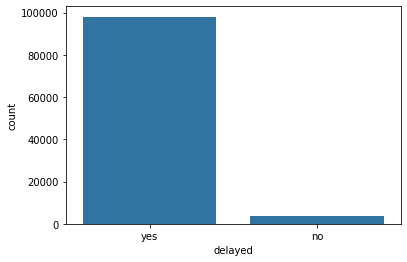

In [28]:
base_color = sb.color_palette()[0]

sb.countplot(data=df_flights,x='delayed',color = base_color);


Apparently from the data, it would seem most flights are delayed than on time.

## Distribution of Carriers

Text(0.5, 0, 'Carrier Code')

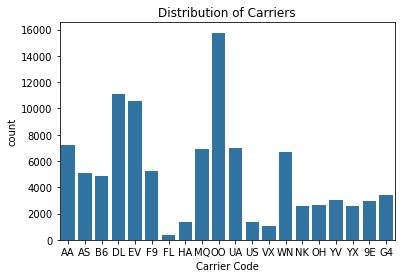

In [29]:
#distribution of carrier names
sb.countplot(data=df_flights,x='carrier',color = base_color);
plt.title('Distribution of Carriers')
plt.xlabel('Carrier Code')


The most popular carrier is SkyWest Airlines Inc. [OO] closely followed Delta Air Lines Inc.[DL] and ExpressJet Airlines Inc. [EV]

### Investigating Delays Distributions 


The most popular flights carriers is SkyWest Airlines Inc. [OO] closely followed Delta Air Lines Inc.[DL] and ExpressJet Airlines Inc. [EV]

The flights delay types (arrival_delay_time, carrier_flights_delayed, weather_flights_delayed, nas_flights_delayed,security_flights_delayed,late_aircraft_delayed ) distributions are all observed to be right- skewed (having low values with high frequencies).

A logarithm plot was plotted for arrival_delay_time and carrier_flights_delayed variables. This also confirmed the high frequencies with low values tailing off at around 3000.

The log plot for carrier_flights_delayed was observed not to be normalized.

The plots for other delays show similar trend.


In [30]:
df_flights.arrival_delay_time.value_counts()

0.0        3587
15.0        146
17.0        141
16.0        134
18.0        125
           ... 
8948.0        1
19349.0       1
10098.0       1
27392.0       1
15374.0       1
Name: arrival_delay_time, Length: 16858, dtype: int64

(0, 6000)

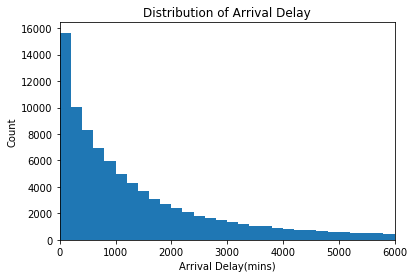

In [73]:
#Distribution of arrival delay
# start with a standard-scaled plot

binsize = 200
bins = np.arange(0, df_flights['arrival_delay_time'].max()+binsize, binsize)
plt.hist(data = df_flights, x = 'arrival_delay_time', bins = bins)
plt.title('Distribution of Arrival Delay')
plt.xlabel('Arrival Delay(mins)')
plt.ylabel('Count')
plt.xlim((0,6000))

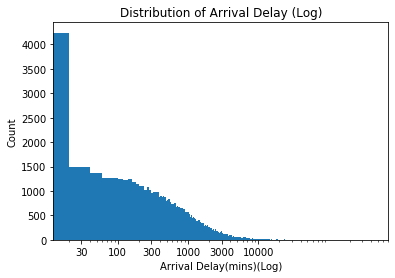

In [74]:
bins = np.arange(0, df_flights['arrival_delay_time'].max()+20,20)
plt.hist(data = df_flights, x = 'arrival_delay_time', bins = bins)
plt.xscale('log')
plt.title('Distribution of Arrival Delay (Log)')
plt.xlabel('Arrival Delay(mins)(Log)')
plt.ylabel('Count')
plt.xticks([30, 100, 300, 1000, 3000, 10000], [30, 100, 300, 1000, 3000, 10000]);

In [33]:
np.log10(df_flights['arrival_delay_time'].describe())


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.007043
mean     3.653307
std      4.104378
min          -inf
25%      2.593286
50%      3.061075
75%      3.496930
max      5.632654
Name: arrival_delay_time, dtype: float64

This plot shows the distribution of arrival delays (in minutes) is right skewed that is, there is a long tail. So putting this in a log scale instead by doing axis transformation

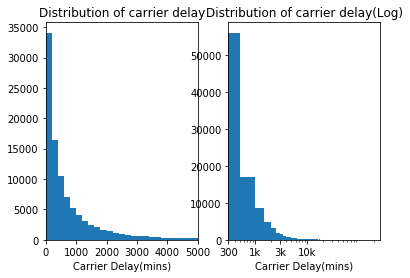

In [72]:
#distribution of Carrier time delays
binsize = 200
plt.subplot(1, 2, 1)
bins = np.arange(0, df_flights['carrier_delay_time'].max()+binsize, binsize)
#plt.figure(figsize=[6,6])
plt.title('Distribution of carrier delay')
plt.hist(data = df_flights, x = 'carrier_delay_time', bins = bins)
plt.xlabel('Carrier Delay(mins)')
plt.ylabel('Count')
plt.xlim((0,5000))

#Distribution of carrier delay in log scale
plt.subplot(1, 2, 2)
bins = np.arange(0, df_flights['carrier_delay_time'].max()+500,500)
plt.hist(data = df_flights, x = 'carrier_delay_time', bins = bins)
plt.title('Distribution of carrier delay(Log)')
plt.xlabel('Carrier Delay(mins)')
plt.ylabel('Count')
plt.xscale('log')
plt.xticks([300, 1000, 3000, 10000], [300, '1k', '3k', '10k']);

In [35]:
df_flights.weather_delay_time.describe()

count    101635.000000
mean        222.085394
std         787.458538
min           0.000000
25%           0.000000
50%          20.000000
75%         151.000000
max       31960.000000
Name: weather_delay_time, dtype: float64

(0, 600)

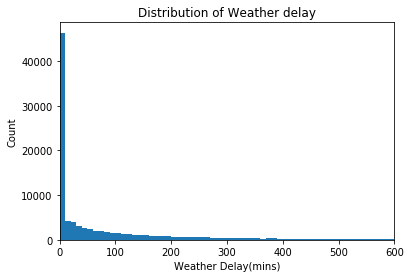

In [79]:
bins =  np.arange(0, df_flights['carrier_delay_time'].max()+10,10)
plt.hist(data = df_flights, x = 'weather_delay_time',bins = bins)
plt.title('Distribution of Weather delay')
plt.xlabel('Weather Delay(mins)');
plt.ylabel('Count')
plt.xlim((0,600))

Text(0, 0.5, 'Count')

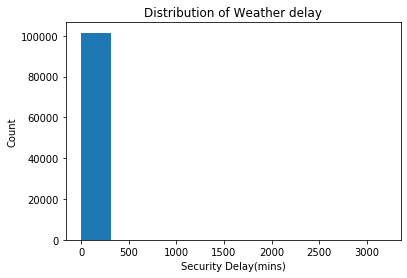

In [80]:
plt.hist(data = df_flights, x = 'security_delay_time')
plt.title('Distribution of Weather delay')
plt.xlabel('Security Delay(mins)');
plt.ylabel('Count')

Text(0, 0.5, 'Count')

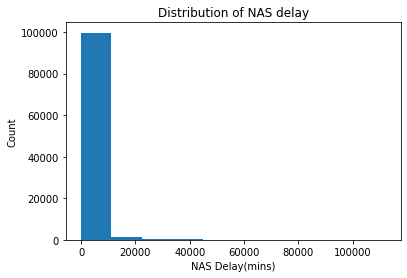

In [77]:
plt.hist(data = df_flights, x = 'nas_delay_time')
plt.title('Distribution of NAS delay')
plt.xlabel('NAS Delay(mins)');
plt.ylabel('Count')

Text(0, 0.5, 'Count')

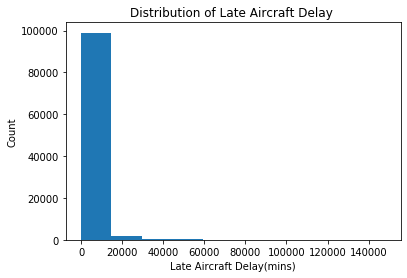

In [78]:
plt.hist(data = df_flights, x = 'late_aircraft_delay')
plt.title('Distribution of Late Aircraft Delay ')
plt.xlabel('Late Aircraft Delay(mins)');
plt.ylabel('Count')

The most popular flights carriers is SkyWest Airlines Inc. [OO] closely followed Delta Air Lines Inc.[DL] and ExpressJet Airlines Inc. [EV]


The flights delay types (arrival_delay_time, carrier_flights_delayed, weather_flights_delayed, nas_flights_delayed,security_flights_delayed,late_aircraft_delayed ) distributions are all observed to be right- skewed (having low values with high frequencies).

A logarithm plot was plotted for arrival_delay_time and carrier_flights_delayed variables. This also confirmed the  high frequencies with low values tailing off at around 3000.

The log plot for carrier_flights_delayed was observed not to be normalized. 

The plots for other delays show similar trend.

- Rows with null values were dropped
- I also rounded up the columns for delay counts for each delay type and assigned it to delayed_flights count



## Bivariate Exploration


### Exploring Correlation Between the Variables

From the heat map, it can be seen that 

#### Correlation with Arriving_flights

- Arriving_flights is strongly correlated with Carrier delays (0.911). This is followed by late aircraft delays of 0.862.
- The delays due to security is the least correlated to arriving flights of 0.384


#### Correlation with Delayed Flights

- Late aircraft is strongly correlated with delayed flights (0.959) . This is followed by carrier delay time (0.922) and NAS delay (0.838)
- Once again, the delays due to security is the least correlated to delayed flights of 0.40

We will be looking at how the all 6 delay variables correlate with one another, variables with a high correlation coefficient would be focused on.

Cases where overplotting may possibly occur will be observed as well by using transaparency, jitter and sampling

Heat maps will also be observed.


In [40]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101635 entries, 0 to 101634
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   carrier              101635 non-null  object        
 1   arriving_flights     101635 non-null  int64         
 2   delayed_flights      101635 non-null  int64         
 3   flights_cancelled    101635 non-null  int64         
 4   flights_diverted     101635 non-null  int64         
 5   arrival_delay_time   101635 non-null  float64       
 6   carrier_delay_time   101635 non-null  float64       
 7   weather_delay_time   101635 non-null  float64       
 8   nas_delay_time       101635 non-null  float64       
 9   security_delay_time  101635 non-null  float64       
 10  late_aircraft_delay  101635 non-null  float64       
 11  date                 101635 non-null  datetime64[ns]
 12  delayed              101635 non-null  object        
dtypes: datetime64[

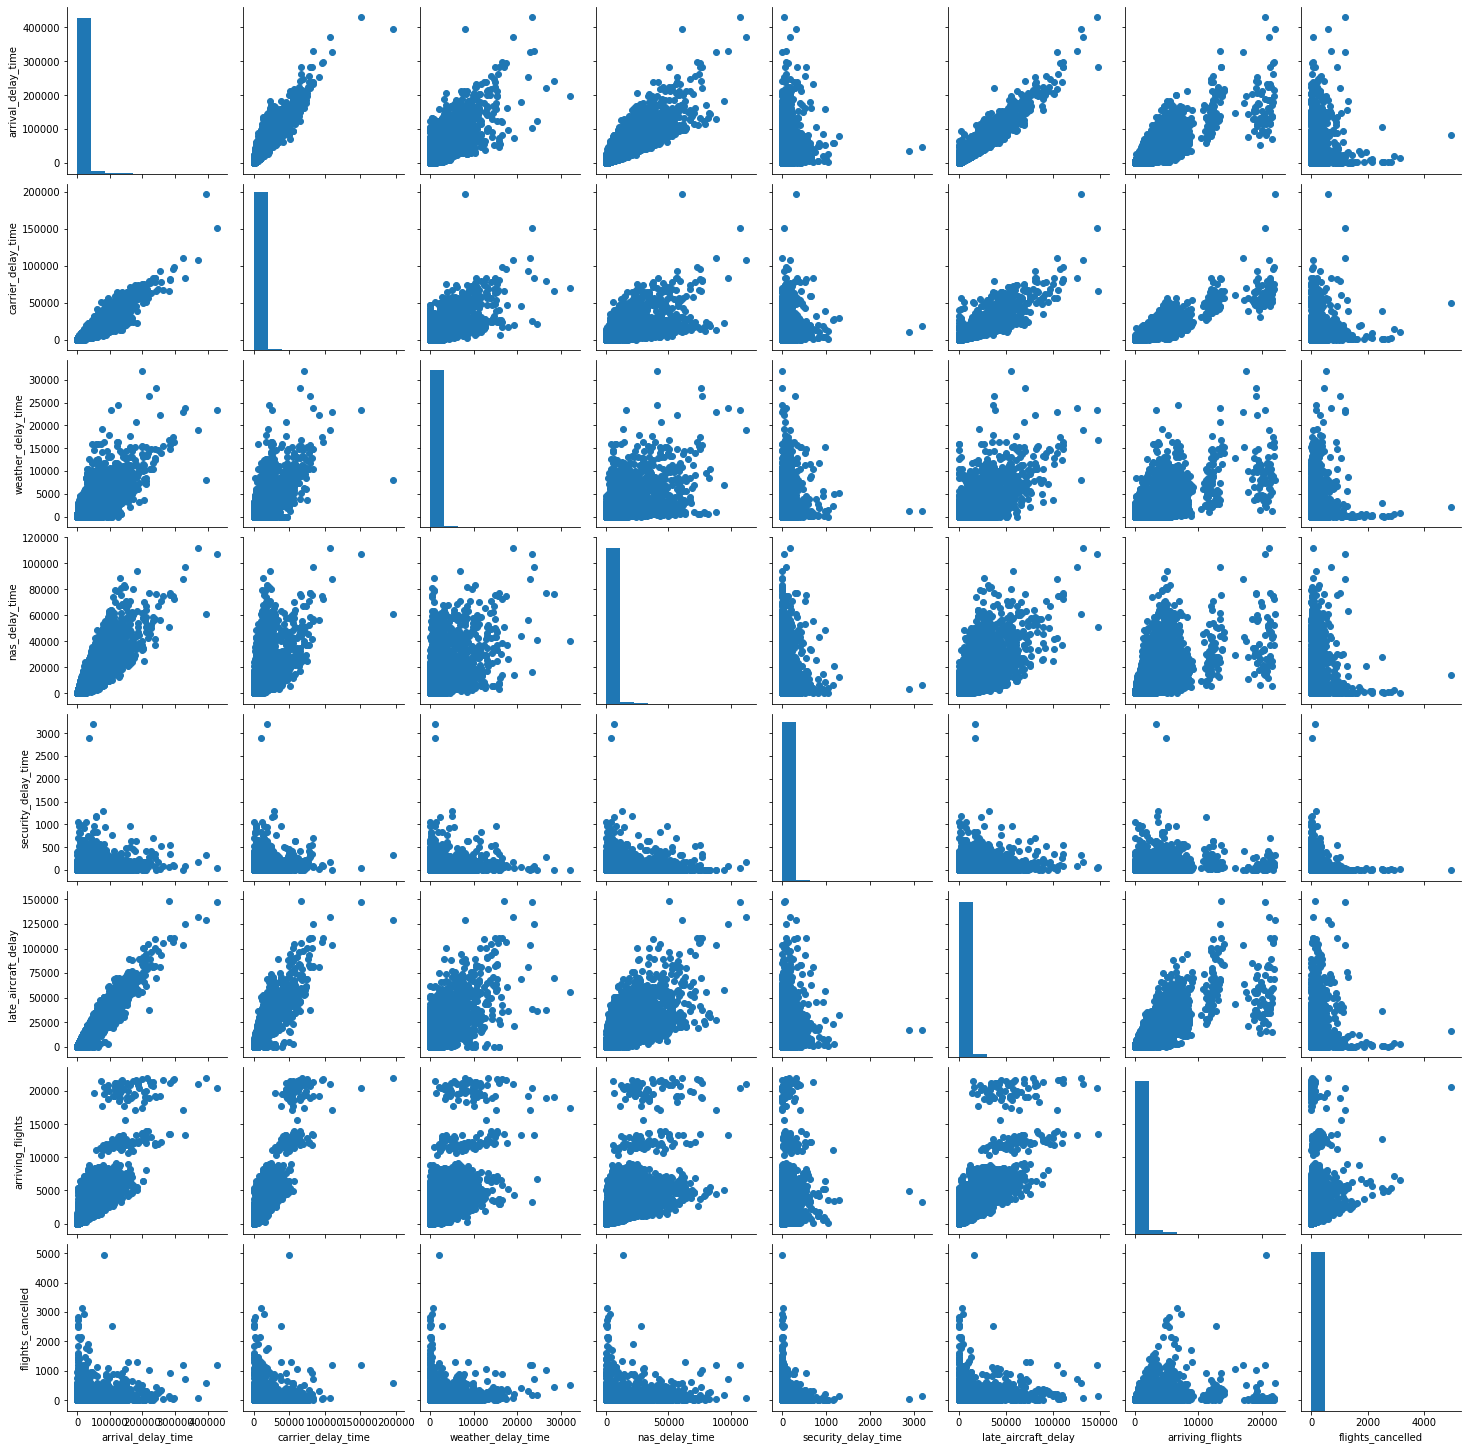

In [41]:
g = sb.PairGrid(data = df_flights, vars = ['arrival_delay_time', 'carrier_delay_time', 'weather_delay_time', 'nas_delay_time', 'security_delay_time',
                                  'late_aircraft_delay', 'arriving_flights','flights_cancelled'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

Text(0, 0.5, 'Cancelled Flights')

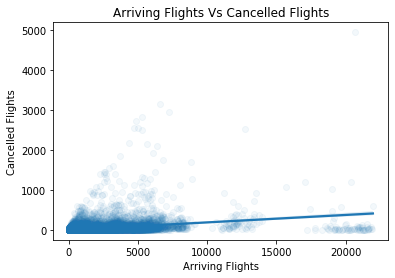

In [81]:
# scatter plot between arriving_flights and flights_cancelled

sb.regplot(data=df_flights, x = 'arriving_flights', y = 'flights_cancelled', x_jitter = 0.3,
          scatter_kws = {'alpha': 1/20})
plt.title('Arriving Flights Vs Cancelled Flights')
plt.xlabel ('Arriving Flights')
plt.ylabel('Cancelled Flights')

By adding some jitter and transaparency, we can see more clearly the relationship between arriving and cancelled flights to see where the major points lie
The regression line suggests a ----------- 

In [43]:
df_flights

,carrier,arriving_flights,delayed_flights,flights_cancelled,flights_diverted,arrival_delay_time,carrier_delay_time,weather_delay_time,nas_delay_time,security_delay_time,late_aircraft_delay,date,delayed
0,AA,146,34,0,0,2157.0,690.0,60.0,280.0,0.0,1127.0,2014-04-01,yes
1,AA,236,45,2,0,2221.0,1216.0,55.0,250.0,0.0,700.0,2014-04-01,yes
2,AA,476,93,0,0,4111.0,1392.0,611.0,860.0,0.0,1248.0,2014-04-01,yes
3,AA,438,106,2,2,5778.0,2378.0,400.0,1057.0,0.0,1943.0,2014-04-01,yes
4,AA,222,41,2,0,2012.0,880.0,271.0,299.0,0.0,562.0,2014-04-01,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101630,YX,25,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2020-05-01,no
101631,YX,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2020-05-01,no
101632,YX,29,1,0,0,19.0,0.0,0.0,19.0,0.0,0.0,2020-05-01,yes
101633,YX,9,0,4,0,0.0,0.0,0.0,0.0,0.0,0.0,2020-05-01,no


### Heat Map

Plotting the heat map for the quantitative variables comes next for more insight into the correlation between the variables.


In [44]:
#creating a list of the delay times for use in heat map

delay_times = ['carrier_delay_time', 'weather_delay_time', 'nas_delay_time', 'security_delay_time',
                                  'late_aircraft_delay', 'arriving_flights','delayed_flights']

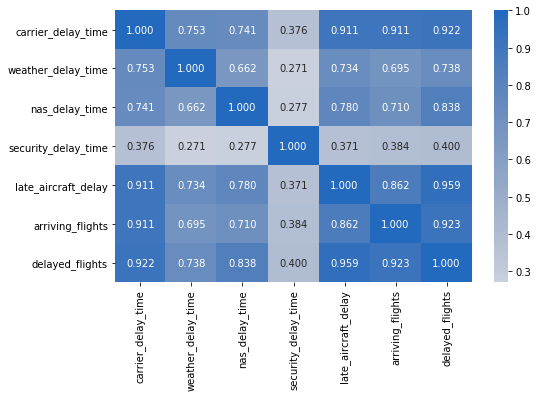

In [45]:
#plotting the heat map

plt.figure(figsize = [8, 5])
sb.heatmap(df_flights[delay_times].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)

From the scatter plot matrix and heat map, it can be seen that 

### Correlation with Arriving_flights

- Arriving_flights is strongly correlated with Carrier delays (0.911). This is followed by late aircraft delays of 0.862.
- The delays due to security is the least correlated to arriving flights of 0.384


### Correlation with Delayed Flights

- Late aircraft is strongly correlated with delayed flights (0.959) . This is followed by carrier delay time (0.922) and NAS delay (0.838)
- Once again, the delays due to security is the least correlated to delayed flights of 0.40

### Answering Research Question


Next, I'll investigate the scatter plot of each delays with carrier

### Exploring Correlation Between Delay Variables



In [46]:
def scatterplots(data,x,y):
    #Function to plot scatter plots, taking three parameters
    plt.figure(figsize =[6, 6])
    plt.scatter(data = data, x = x, y = y, alpha = 1/3)
    plt.xlabel('{}(mins)'.format(x))
    plt.ylabel('{}(mins)'.format(y))

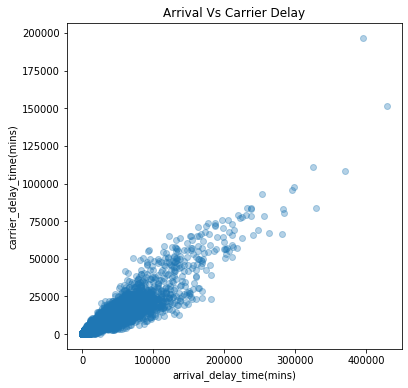

In [47]:
scatterplots(df_flights, 'arrival_delay_time', 'carrier_delay_time')
plt.title('Arrival Vs Carrier Delay');

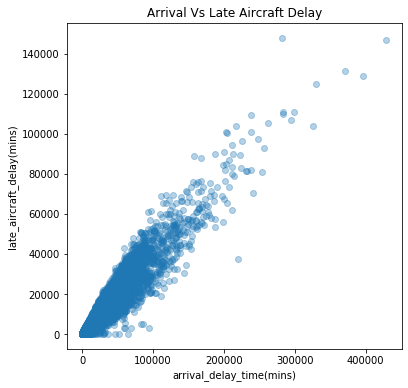

In [48]:
scatterplots(df_flights,'arrival_delay_time','late_aircraft_delay')
plt.title('Arrival Vs Late Aircraft Delay');

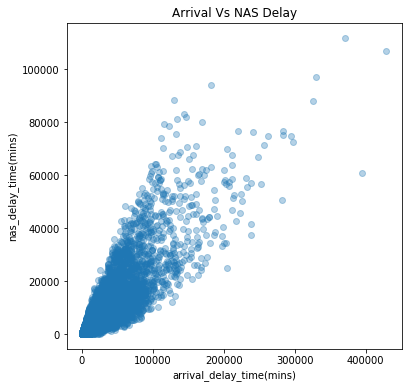

In [49]:
scatterplots(df_flights,'arrival_delay_time','nas_delay_time')
plt.title('Arrival Vs NAS Delay');

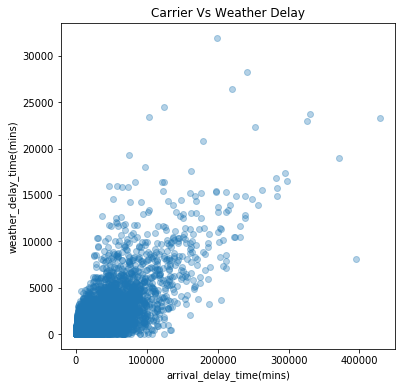

In [50]:
scatterplots(df_flights,'arrival_delay_time','weather_delay_time')
plt.title('Carrier Vs Weather Delay');

Text(0, 0.5, 'Carrier Delay')

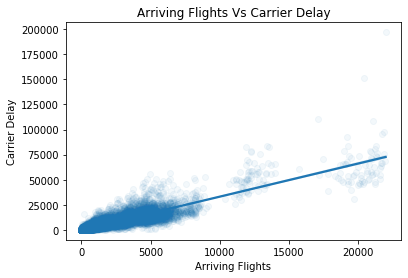

In [75]:
# scatter plot between arriving_flights and carrier delays

sb.regplot(data=df_flights, x = 'arriving_flights', y = 'carrier_delay_time', x_jitter = 0.3,
          scatter_kws = {'alpha': 1/20})
plt.title('Arriving Flights Vs Carrier Delay');
plt.xlabel ('Arriving Flights')
plt.ylabel('Carrier Delay')

### Violin plot between carrier and arriving flights to find out which carrier has more flights that arrived

In [52]:
#violin plot between carriers and arriving_flights
carrier_types = ['EV','OO','DL','MQ','WN','AA','UA','US','F9','B6','AS','FL','VX','HA']
carrier_classes = pd.api.types.CategoricalDtype(ordered = True, categories = carrier_types)
df_flights['carrier'] = df_flights['carrier'].astype(carrier_classes);

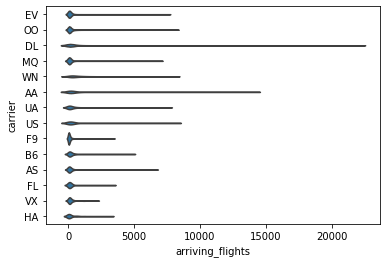

In [53]:
base_color = sb.color_palette()[0]
sb.violinplot(data = df_flights, x = 'arriving_flights', y = 'carrier',color = base_color,inner = None)


### Exploring Average Delay Times with Carrier

From the bar plots, carrier delays and late aircraft delays had the highest impact on carriers arriving late.
Arrival delay for all delay types had an average sum of 61903 minutes of delay across the carriers. 


The carriers that suffer the most delays are Southwest Airlines Co. [WN], American Airlines Inc. [AA] and  United Air Lines Inc. [UA]  in this order.

The following carriers suffered the most delays in order are

1. Southwest Airlines Co. [WN] 
2. American Airlines Inc. [AA] 
3. United Air Lines Inc. [UA] 
4. JetBlue Airways [B6]
5. Delta Air Lines Inc.[DL] 
6. Virgin America [VX]  carriers


### Answering Research Question


Next, I'll investigate the bar plot distribution of each delays with carrier. 

In [54]:
def barplots(data, x, y, order):
    #Function to plot bar plot taking in 4 parameters where order is the mean variable index 
    #when the data frame has been grouped by carrier
    base_color = sb.color_palette()[0]
    sb.barplot(data = data, x = x, y = y, color = base_color,  order = order)
    plt.xticks(rotation = 70)
    plt.xlabel(x)
    plt.ylabel(y)

19331.335294000524

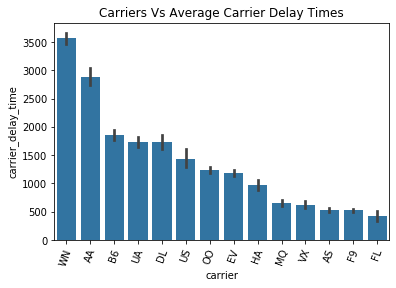

In [56]:
carrier_mean = df_flights.groupby(['carrier'])['carrier_delay_time'].mean()
carrier_order = carrier_mean.sort_values(ascending = False).index
barplots(df_flights,'carrier','carrier_delay_time',carrier_order)
plt.title('Carriers Vs Average Carrier Delay Times')
carrier_mean.sum()

- Southwest Airlines Co. [WN] has the highest delay time of more than 3500 mins followed by American Airlines Inc. [AA] with about 2900 mins and JetBlue Airways [B6]. United Air Lines Inc. [UA] and Delta Air Lines Inc.[DL] carriers seem to have the same delay times.

61903.29080858876

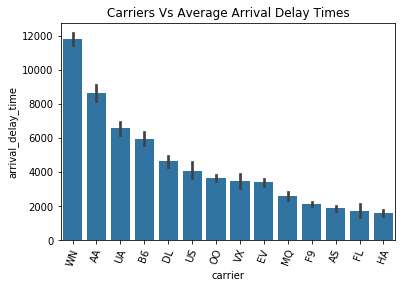

In [57]:
arrival_mean = df_flights.groupby(['carrier'])['arrival_delay_time'].mean()
arrival_order = arrival_mean.sort_values(ascending = False).index
barplots(df_flights,'carrier','arrival_delay_time',arrival_order)
plt.title('Carriers Vs Average Arrival Delay Times')
arrival_mean.sum()

- In terms of arrival delay times generally, Southwest Airlines Co. [WN] has the highest delay time of almost 12000 mins followed by American Airlines Inc. [AA] with about 8300 mins and JetBlue Airways [B6]. United Air Lines Inc. [UA] has a delay of about 6300 mins and Delta Air Lines Inc.[DL] carrier has  a delay of about 4100mins. 

104.08120817519227

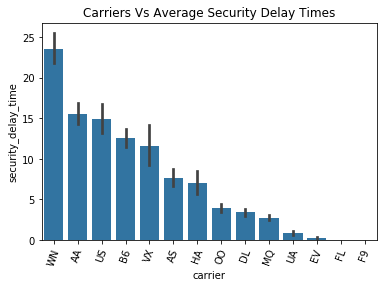

In [59]:
security_mean = df_flights.groupby(['carrier'])['security_delay_time'].mean()
security_order = security_mean.sort_values(ascending = False).index
barplots(df_flights, 'carrier', 'security_delay_time', security_order)
plt.title('Carriers Vs Average Security Delay Times');
security_mean.sum()

- In terms of average security delay times, Southwest Airlines Co. [WN] also has the highest delay time followed by American Airlines Inc. [AA] and US Airways Inc. [US]. The times associated with security delays are notably shorter than the other delays ecplored thus far.


15174.960083586584

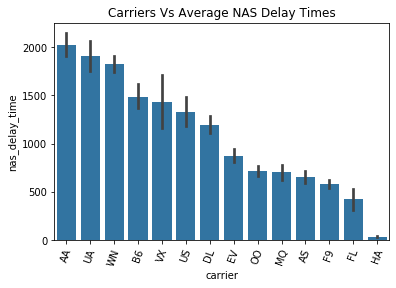

In [60]:
nas_mean = df_flights.groupby(['carrier'])['nas_delay_time'].mean()
nas_order = nas_mean.sort_values(ascending = False).index
barplots(df_flights, 'carrier', 'nas_delay_time', nas_order)
plt.title('Carriers Vs Average NAS Delay Times');
nas_mean.sum()

- American Airlines Inc. [AA]  has the highest delay time due to NAS delay followed by United Air Lines Inc. [UA] and Southwest Airlines Co. [WN]. JetBlue Airways [B6] comes fourth and Virgin America [VX] comes fifth.


24537.083268771592

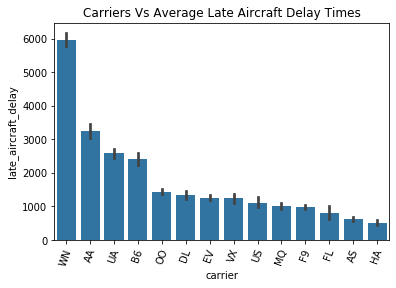

In [61]:
late_aircraft_mean = df_flights.groupby(['carrier'])['late_aircraft_delay'].mean()
late_aircraft_order = late_aircraft_mean.sort_values(ascending = False).index
barplots(df_flights, 'carrier', 'late_aircraft_delay', late_aircraft_order)
plt.title('Carriers Vs Average Late Aircraft Delay Times');
late_aircraft_mean.sum()

2755.793732259022

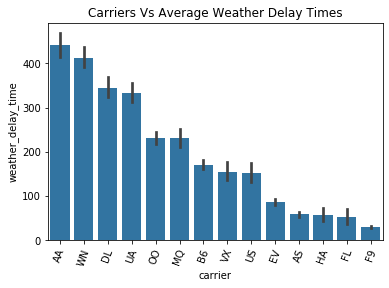

In [62]:
weather_mean = df_flights.groupby(['carrier'])['weather_delay_time'].mean()
weather_order = weather_mean.sort_values(ascending = False).index
barplots(df_flights, 'carrier', 'weather_delay_time', weather_order)
plt.title('Carriers Vs Average Weather Delay Times');
weather_mean.sum()

From the bar plots above, carrier delays and late aircraft delays had the highest impact on carriers arriving late.
Arrival delay for all delay types had an average sum of 61903 minutes of delay across the carriers. 

- Carrier delay has an average sum of 19331 mins
- security delay has 104 minutes delay
- NAS delay has an average sum of 15174 mins
- Late aircraft delay has an average sum of 24537 mins
-  Weather delay has an average sum of 2755 mins, all across the flight carriers

Another observation from the bar plots above, the following carriers were tops

- Southwest Airlines Co. [WN] 
- American Airlines Inc. [AA] 
- United Air Lines Inc. [UA] 
- JetBlue Airways [B6]
- Delta Air Lines Inc.[DL] 
- Virgin America [VX]  carriers

The carriers that suffer the most delays are Southwest Airlines Co. [WN], American Airlines Inc. [AA] and  United Air Lines Inc. [UA]  in this order.

## Multivariate Exploration



### Color Plots for Carriers Affected Most by Delay Types

The color graphs show there is a huge impact of carrier delays on arrival times

The color graphs plotted, also show the impact the delays due to carrier, NAS, late aircraft, and weather have on top carriers.

Surprisingly, security and weather delays were not the strongest impacts on carrier delays as I initially suspected.

From the analysis of the color plots, carrier delays, NAS delays, and late aircrafts delays have the strongest impact on carriers with Southwest Airlines Co. [WN] being the most impacted airline.

Next I'll plot color graphs to show the distribution amongst the top carriers with the most delays

In [63]:
top_carriers = df_flights.loc[df_flights['carrier'].isin(['WN','AA','UA','B6'])]

def color_graphs(data, x, y, hue):
    #function plotting a  FacetGrid color graph with four parameters
    
    g = sb.FacetGrid(data = data, hue = hue, height = 6, palette = 'colorblind')
    g.map(plt.scatter, x, y)
    g.add_legend(title = 'Carrier')

In [64]:
top_carriers.head()

,carrier,arriving_flights,delayed_flights,flights_cancelled,flights_diverted,arrival_delay_time,carrier_delay_time,weather_delay_time,nas_delay_time,security_delay_time,late_aircraft_delay,date,delayed
0,AA,146,34,0,0,2157.0,690.0,60.0,280.0,0.0,1127.0,2014-04-01,yes
1,AA,236,45,2,0,2221.0,1216.0,55.0,250.0,0.0,700.0,2014-04-01,yes
2,AA,476,93,0,0,4111.0,1392.0,611.0,860.0,0.0,1248.0,2014-04-01,yes
3,AA,438,106,2,2,5778.0,2378.0,400.0,1057.0,0.0,1943.0,2014-04-01,yes
4,AA,222,41,2,0,2012.0,880.0,271.0,299.0,0.0,562.0,2014-04-01,yes


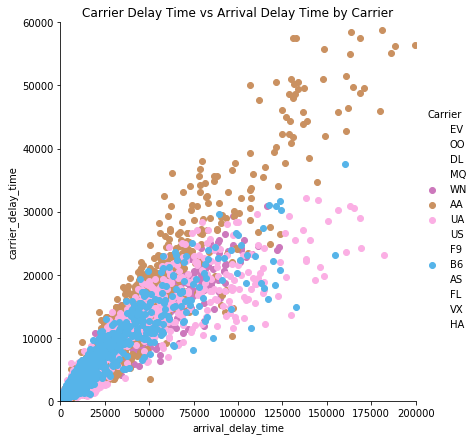

In [65]:
color_graphs(top_carriers, 'arrival_delay_time', 'carrier_delay_time','carrier');
plt.xlim(0, 200000)
plt.ylim(0, 60000)
plt.title('Carrier Delay Time vs Arrival Delay Time by Carrier');

This color graph shows there is a huge impact of carrier delays on arrival times 

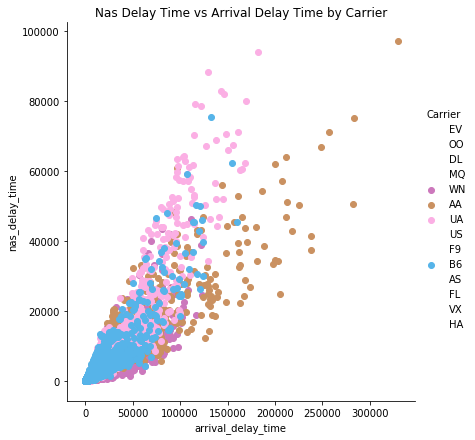

In [66]:
color_graphs(top_carriers, 'arrival_delay_time', 'nas_delay_time', 'carrier')
plt.title('Nas Delay Time vs Arrival Delay Time by Carrier');

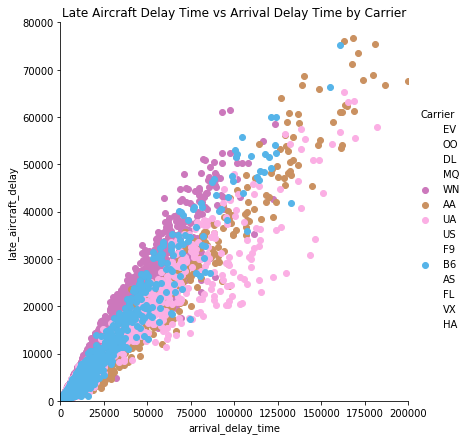

In [67]:
color_graphs(top_carriers, 'arrival_delay_time', 'late_aircraft_delay', 'carrier')
plt.xlim(0, 200000)
plt.ylim(0, 80000)
plt.title('Late Aircraft Delay Time vs Arrival Delay Time by Carrier');

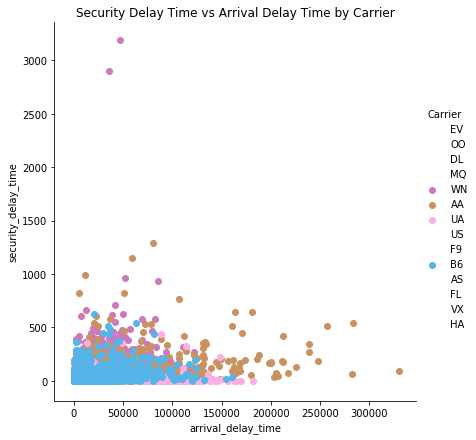

In [68]:
color_graphs(top_carriers, 'arrival_delay_time', 'security_delay_time', 'carrier')
plt.title('Security Delay Time vs Arrival Delay Time by Carrier');

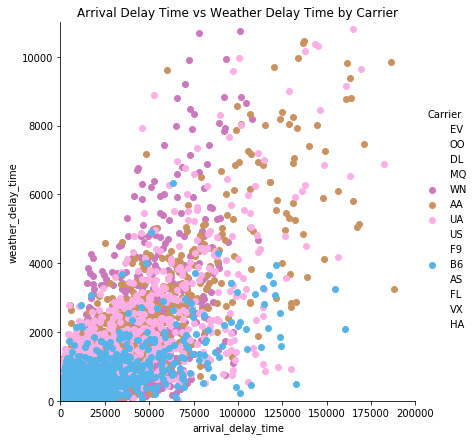

In [69]:
color_graphs(top_carriers, 'arrival_delay_time','weather_delay_time','carrier')
plt.xlim(0, 200000)
plt.ylim(0, 11000)
plt.title('Arrival Delay Time vs Weather Delay Time by Carrier');

The color graphs plotted above show the impact the delays due to carrier, NAS, late aircraft, and weather have on top carriers.

Surprisingly, security and weather delays were not the strongest impacts on carrier delays as I initially suspected. 

From the analysis of the color plots above, carrier delays, NAS delays, and late aircrafts delays have the strongest impact on carriers with Southwest Airlines Co. [WN] being the most impacted airline.

### Conclusion 

1. The airline carrier with the worst on-time performance record is Southwest Airlines Co. [WN]
2. The most prevalent reasons for delays are carrier delays, NAS delays, and late aircrafts delays



###  Research Questions Answers:
- Which airlines carrier had the worst on-time performance record? = Southwest Airlines Co. [WN] 
- What are the prevalent reasons for delays? = carrier delays, NAS delays, and late aircrafts delays 